In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
from scipy.optimize import curve_fit

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('covid19-07052020.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    80 non-null     object 
 1   cases   57 non-null     float64
 2   new     56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [7]:
df['Date']= pd.to_datetime(df['Date']) 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    80 non-null     datetime64[ns]
 1   cases   57 non-null     float64       
 2   new     56 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.9 KB


In [9]:
def fsigmoid( x, a, b, s, x0):
    return s * (1.0 / (1.0 + np.exp(-a*(x-b)))) + x0

In [10]:
df = df.dropna(how='any',axis=0) 


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 56
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    56 non-null     datetime64[ns]
 1   cases   56 non-null     float64       
 2   new     56 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.8 KB


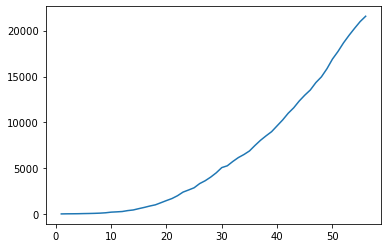

In [12]:
plt.plot( df.index, df['cases'])
plt.show()

In [13]:
popt, pcov = curve_fit( fsigmoid, df.index,df['cases'], method='lm')

<ipython-input-9-99b27cdf9de3>:2: RuntimeWarning: overflow encountered in exp
  return s * (1.0 / (1.0 + np.exp(-a*(x-b)))) + x0


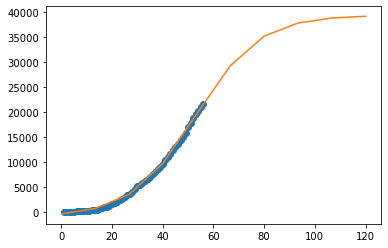

In [18]:
x = np.linspace(0,120,10)
y = fsigmoid(x,*popt)
plt.plot(df.index, df['cases'], 'o', label='data')
plt.plot(x,y, label='fit')
plt.show()

In [15]:
print( pcov )

[[ 8.02808592e-06  3.48194211e-03 -6.25251125e+00  5.92760397e+00]
 [ 3.48194211e-03  1.66277943e+00 -2.95231118e+03  2.82756162e+03]
 [-6.25251125e+00 -2.95231118e+03  5.27895645e+06 -5.04570550e+06]
 [ 5.92760397e+00  2.82756162e+03 -5.04570550e+06  4.82920622e+06]]


In [16]:
print ( popt )

[-7.95803035e-02  5.28210082e+01 -4.03027407e+04  3.92940796e+04]
